# Object-Oriented Programming in Python on DataCamp  exercises:
# Chapter 4 Best Practices of Class Design:

## 1. Polymorphic methods
To design classes effectively, you need to understand how inheritance and polymorphism work together.

In this exercise, you have three classes - one parent and two children - each of which has a talk() method. Analyze the following code:

class Parent:
    
    def talk(self):
        print("Parent talking!")     

class Child(Parent):
    
    def talk(self):
        print("Child talking!")          

class TalkativeChild(Parent):
    
    def talk(self):
        print("TalkativeChild talking!")
        Parent.talk(self)


p, c, tc = Parent(), Child(), TalkativeChild()

for obj in (p, c, tc):
    
    obj.talk()

What is the output of the code above?
### instructions:
You should be able to complete the exercise just by reading the code, without running it in the console!
##### solution:
4.

Parent talking!    
Child talking!    
Talkative Child talking!    
Parent talking!     

## 2. Square and rectangle
The classic example of a problem that violates the Liskov Substitution Principle is the Circle-Ellipse problem, sometimes called the Square-Rectangle problem.

By all means, it seems like you should be able to define a class Rectangle, with attributes h and w (for height and width), and then define a class Square that inherits from the Rectangle. After all, a square "is-a" rectangle!

Unfortunately, this intuition doesn't apply to object-oriented design.
### instructions:
#### 1/4:
* Create a class Rectangle with a constructor that accepts two parameters, h and w, and sets its h and w attributes to the values of h and w.
* Create a class Square inherited from Rectangle with a constructor that accepts one parameter w, and sets both the h and w attributes to the value of w.
##### solution:

In [ ]:
# Define a Rectangle class
class Rectangle:
    def __init__(self,h,w):
        self.h=h
        self.w=w

# Define a Square class
class Square(Rectangle):
    def __init__(self,w):
        Rectangle.__init__(self,w,w)   

#### 2/4:
Question:    
The classes are defined for you. Experiment with them in the console.

For example, in the console or the script pane, create a Square object with side length 4. Then try assigning 7 to the h attribute.

What went wrong with these classes?
##### solution:
The 4x4 Square object would no longer be a square if we assign 7 to h.

#### 3/4:
A Square inherited from a Rectangle will always have both the h and w attributes, but we can't allow them to change independently of each other.

* Define methods set_h() and set_w() in Rectangle, each accepting one parameter and setting h and w.
* Define methods set_h() and set_w() in Square, each accepting one parameter, and setting both h and w to that parameter in both methods.

##### solution:

In [ ]:
class Rectangle:
    def __init__(self, w,h):
      self.w, self.h = w,h

# Define set_h to set h      
    def set_h(self, h):
      self.h = h
      
# Define set_w to set w          
    def set_w(self, w):
      self.w = w
      
      
class Square(Rectangle):
    def __init__(self, w):
      self.w, self.h = w, w 

# Define set_h to set w and h
    def set_h(self, h):
      self.h = h
      self.w = h

# Define set_w to set w and h      
    def set_w(self, w):
      self.h = w
      self.w = w      

#### 4/4:
Question:    
Later in this chapter you'll learn how to make these setter methods run automatically when attributes are assigned new values, don't worry about that for now, just assume that when we assign a value to h of a square, now the w attribute will be changed accordingly.

How does using these setter methods violate Liskov Substitution principle?
##### solution:
Each of the setter methods of Square change both h and w attributes, while setter methods of Rectangle change only one attribute at a time, so the Square objects cannot be substituted for Rectangle into programs that rely on one attribute staying constant.

## 3. Attribute naming conventions
In Python, all data is public. Instead of access modifiers common in languages like Java, Python uses naming conventions to communicate the developer's intention to class users, shifting the responsibility of safe class use onto the class user.

Python uses underscores extensively to signal the purpose of methods and attributes. In this exercise, you will match a use case with the appropriate naming convention.

### instructions:
* Drag the cards into the bucket representing the most appropriate naming convention for the use case.
##### solution:

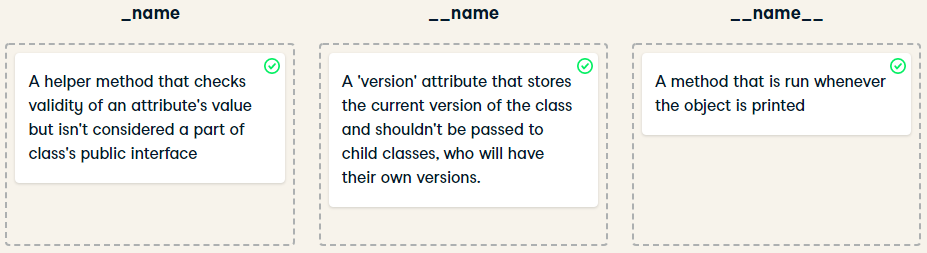

## 4. Using internal attributes
In this exercise, you'll return to the BetterDate class of Chapter 2. Your date class is better because it will use the sensible convention of having exactly 30 days in each month.

You decide to add a method that checks the validity of the date, but you don't want to make it a part of BetterDate public interface.

The class BetterDate is available in the script pane.
### instructions:
* Add a class attribute _MAX_DAYS storing the maximal number of days in a month - 30.
* Add another class attribute storing the maximal number of months in a year - 12. Use the appropriate naming convention to indicate that this is an internal attribute.
* Add an _is_valid() method that returns True if the day and month attributes are less than or equal to the corresponding maximum values, and False otherwise. Make sure to refer to the class attributes by their names!
##### solution:

In [ ]:
# Add class attributes for max number of days and months
class BetterDate:
    _MAX_DAYS=30
    _MAX_MONTHS=12
  
    def __init__(self, year, month, day):
      self.year, self.month, self.day = year, month, day
      
    @classmethod
    def from_str(cls, datestr):
        year, month, day = map(int, datestr.split("-"))
        return cls(year, month, day)
    
    # Add _is_valid() checking day and month values
    def _is_valid(self):
      if self.day<=BetterDate._MAX_DAYS and self.month<=BetterDate._MAX_MONTHS:
        return True
      return False
         
bd1 = BetterDate(2020, 4, 30)
print(bd1._is_valid())

bd2 = BetterDate(2020, 6, 45)
print(bd2._is_valid())

## 5. What do properties do?
You could think of properties as attributes with built-in access control. They are especially useful when there is some additional code you'd like to execute when assigning values to attributes.

Which of the following statements is NOT TRUE about properties?

##### solution:

Properties can be used to implement "read-only" attributes
press

## 6. Create and set properties
There are two parts to defining a property:

* first, define an "internal" attribute that will contain the data;
* then, define a @property-decorated method whose name is the property name, and that returns the internal attribute storing the data.

If you'd also like to define a custom setter method, there's an additional step:

* define another method whose name is exactly the property name (again), and decorate it with @prop_name.setter where prop_name is the name of the property. The method should take two arguments -- self (as always), and the value that's being assigned to the property.

In this exercise, you'll create a balance property for a Customer class - a better, more controlled version of the balance attribute that you worked with before.
### instructions:
#### 1/4:
Create a Customer class with the \__init__() method that:

* takes parameters name and new_bal,
* assigns name to the attribute name,
* raises a ValueError if new_bal is negative,
* otherwise, assigns new_bal to the attribute _balance (with _).

##### solution:

In [ ]:
# Create a Customer class
class Customer:
    def __init__(self,name,new_bal):
        self.name=name
        if new_bal<0:
            raise ValueError("new_bal can't be negative!")
        else:
            self._balance=new_bal

#### 2/4:
* Add a method balance() with a @property decorator that returns the _balance attribute.
##### solution:

In [ ]:
class Customer:
    def __init__(self, name, new_bal):
        self.name = name
        if new_bal < 0:
           raise ValueError("Invalid balance!")
        self._balance = new_bal  
    
    # Add a decorated balance() method returning _balance
    @property
    def balance(self):
        return self._balance

#### 3/4:
Define another balance() method to serve as a setter, with the appropriate decorator and an additional parameter:

* Raise a ValueError if the parameter is negative,
* otherwise assign it to _balance ;
* print "Setter method is called".
##### solution:

In [ ]:
class Customer:
    def __init__(self, name, new_bal):
        self.name = name
        if new_bal < 0:
           raise ValueError("Invalid balance!")
        self._balance = new_bal  

    # Add a decorated balance() method returning _balance        
    @property
    def balance(self):
        return self._balance
     
    # Add a setter balance() method
    @balance.setter
    def balance(self, value):
        # Validate the parameter value
        if value<0:
            raise ValueError("balance can't be negative")
        else:
            self._balance=value
        
        # Print "Setter method is called"
        print("setter method is called")

#### 4/4:
* Create a Customer named Belinda Lutz with the balance of 2000 and save it as cust.
* Use the dot syntax and the = to assign 3000 to cust.balance.
* Print cust.balance. 

In the console, try assigning -1000 to cust.balance. What happens?
##### solution:

In [ ]:
class Customer:
    def __init__(self, name, new_bal):
        self.name = name
        if new_bal < 0:
           raise ValueError("Invalid balance!")
        self._balance = new_bal  

    # Add a decorated balance() method returning _balance        
    @property
    def balance(self):
        return self._balance

    # Add a setter balance() method
    @balance.setter
    def balance(self, new_bal):
        # Validate the parameter value
        if new_bal < 0:
           raise ValueError("Invalid balance!")
        self._balance = new_bal
        print("Setter method called")

# Create a Customer        
cust = Customer("Belinda Lutz",2000)

# Assign 3000 to the balance property
cust.balance=3000

# Print the balance property
print(cust.balance)

## 7. Read-only properties
The LoggedDF class from Chapter 2 was an extension of the pandas DataFrame class that had an additional created_at attribute that stored the timestamp when the DataFrame was created, so that the user could see how out-of-date the data is.

But that class wasn't very useful: we could just assign any value to created_at after the DataFrame was created, thus defeating the whole point of the attribute! Now, using properties, we can make the attribute read-only.

The LoggedDF class from Chapter 2 is available for you in the script pane.
### instructions:
#### 1/3:
* Assign a new value of '2035-07-13' to the created_at attribute.
* Print the value of ldf's created_at attribute to verify that your assignment was successful.

##### solution:

In [ ]:
import pandas as pd
from datetime import datetime

# LoggedDF class definition from Chapter 2
class LoggedDF(pd.DataFrame):
    def __init__(self, *args, **kwargs):
        pd.DataFrame.__init__(self, *args, **kwargs)
        self.created_at = datetime.today()

    def to_csv(self, *args, **kwargs):
        temp = self.copy()
        temp["created_at"] = self.created_at
        pd.DataFrame.to_csv(temp, *args, **kwargs)   

# Instantiate a LoggedDF called ldf
ldf = LoggedDF({"col1": [1,2], "col2":[3,4]}) 

# Assign a new value to ldf's created_at attribute and print
ldf.created_at = '2035-07-13'
print(ldf.created_at)

#### 2/3:
* Create an internal attribute called _created_at to turn created_at into a read-only attribute.
* Modify the class to use the internal attribute, _created_at, in place of created_at.

##### solution:

In [ ]:
import pandas as pd
from datetime import datetime

# MODIFY the class to use _created_at instead of created_at
class LoggedDF(pd.DataFrame):
    def __init__(self, *args, **kwargs):
        pd.DataFrame.__init__(self, *args, **kwargs)
        self._created_at = datetime.today()
    
    def to_csv(self, *args, **kwargs):
        temp = self.copy()
        temp["created_at"] = self._created_at
        pd.DataFrame.to_csv(temp, *args, **kwargs)   
    
    # Add a read-only property: _created_at
    @property  
    def created_at(self):
        return self._created_at

# Instantiate a LoggedDF called ldf
ldf = LoggedDF({"col1": [1,2], "col2":[3,4]}) 

#### 3/3:
Question:   
What happens when you assign '2035-07-13' to ldf.created_at?
##### solution:
An AttributeError is thrown since ldf.created_at is read-only.